In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('stud.csv')

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Checking for missing value

In [4]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

No null/missing data is present in the dataset.

Checking for duplicate value

In [7]:
df.duplicated().sum()

0

No duplicate value is present in the dataset.

Checking unique value present in each column

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Lets check datatypes in dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
Numerical_features = [features for features in df.columns if df[features].dtype != 'O']
Categorical_features = [features for features in df.columns if df[features].dtype == 'O']

In [19]:
Numerical_features, Categorical_features

(['math_score', 'reading_score', 'writing_score'],
 ['gender',
  'race_ethnicity',
  'parental_level_of_education',
  'lunch',
  'test_preparation_course'])

Now lets see statistical description of the dataset

In [20]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


- Mean of all scores are almost same
- Min score in maths is 0 
- All values are close to each other that is there is not much variance

Lets check correlation between values

<AxesSubplot: >

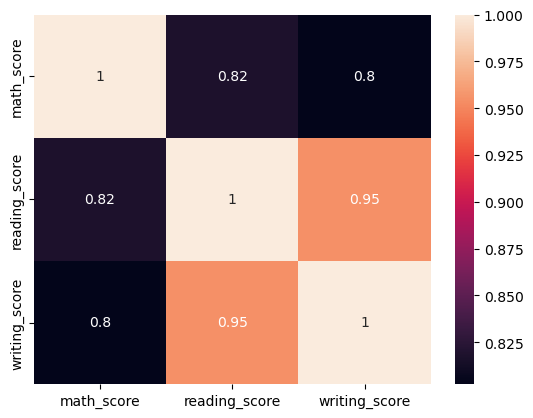

In [27]:
sns.heatmap(df.corr(), annot = True)

By the plot we can clearly see each value is highly related to each other, so we can say if someone is good in one subject he/she is good in other too.

## Lets explore more about dataset

In [62]:
df['Total']  = df['math_score']+df['reading_score']+df['writing_score']
df['avg'] = df['Total']/3
df=df.drop('Toatl', axis=1)

In [63]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,avg
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


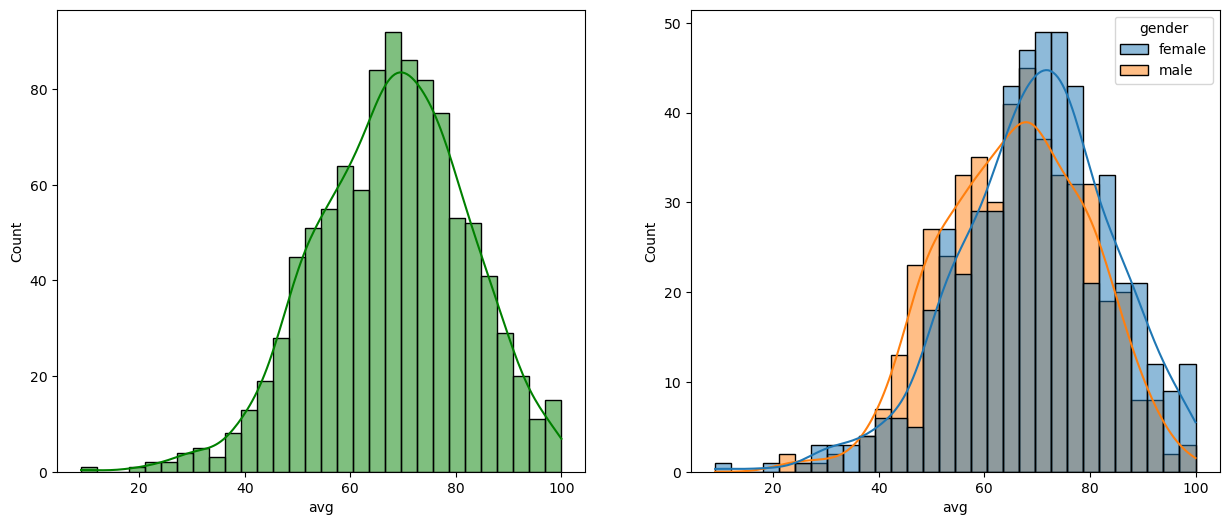

In [45]:
plt.subplots(1,2,figsize = (15,6))
plt.subplot(121)
sns.histplot(data=df, x='avg',bins=30,kde=True, color = 'green')
plt.subplot(122)
sns.histplot(data=df,x='avg',bins=30,kde=True,hue = 'gender')
plt.show()

From above it can be easily seen that females tend to perform better than males.

## Average Marks of student vs lunch served

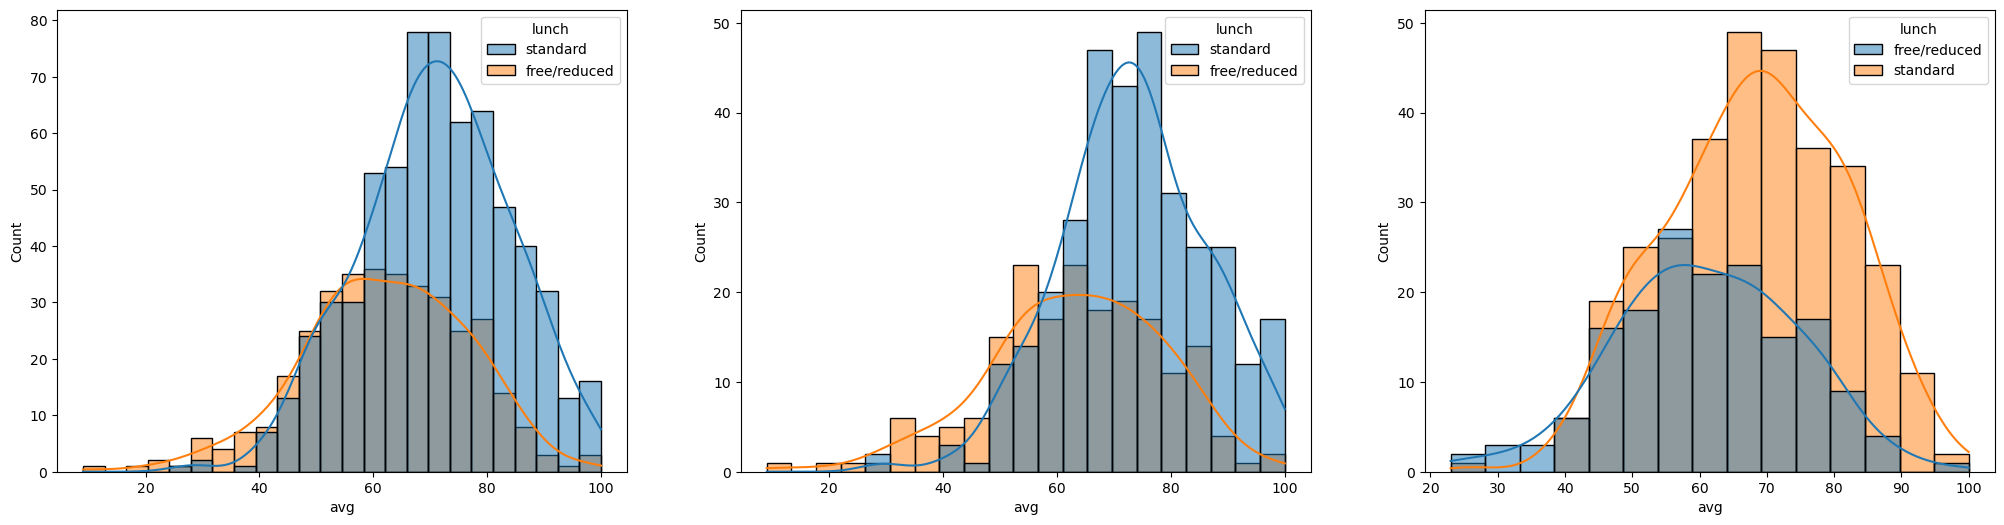

In [56]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg',kde=True,hue = 'lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='avg',kde=True, hue = 'lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x='avg',kde=True,hue = 'lunch')
plt.show()

Students who are getting standard lunch are performing way better irrespective of their gender

## Average Marks of student vs Their Race

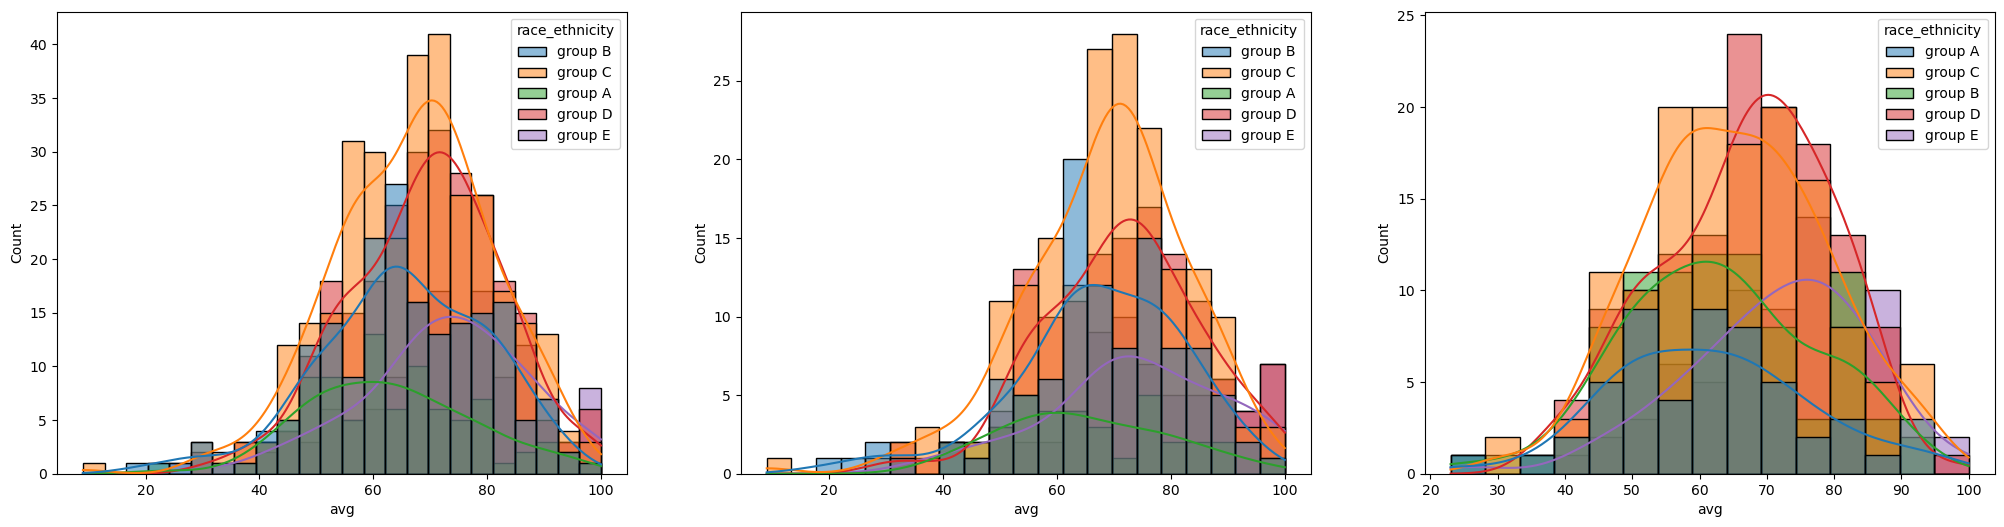

In [57]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg',kde=True,hue = 'race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='avg',kde=True, hue = 'race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x='avg',kde=True,hue = 'race_ethnicity')
plt.show()

- students belongs to group 'A' and 'B' do not perform well irrespective of their gender
- students of 'E' and 'D' group perfrom well

## Average Marks of student vs Parental level of education

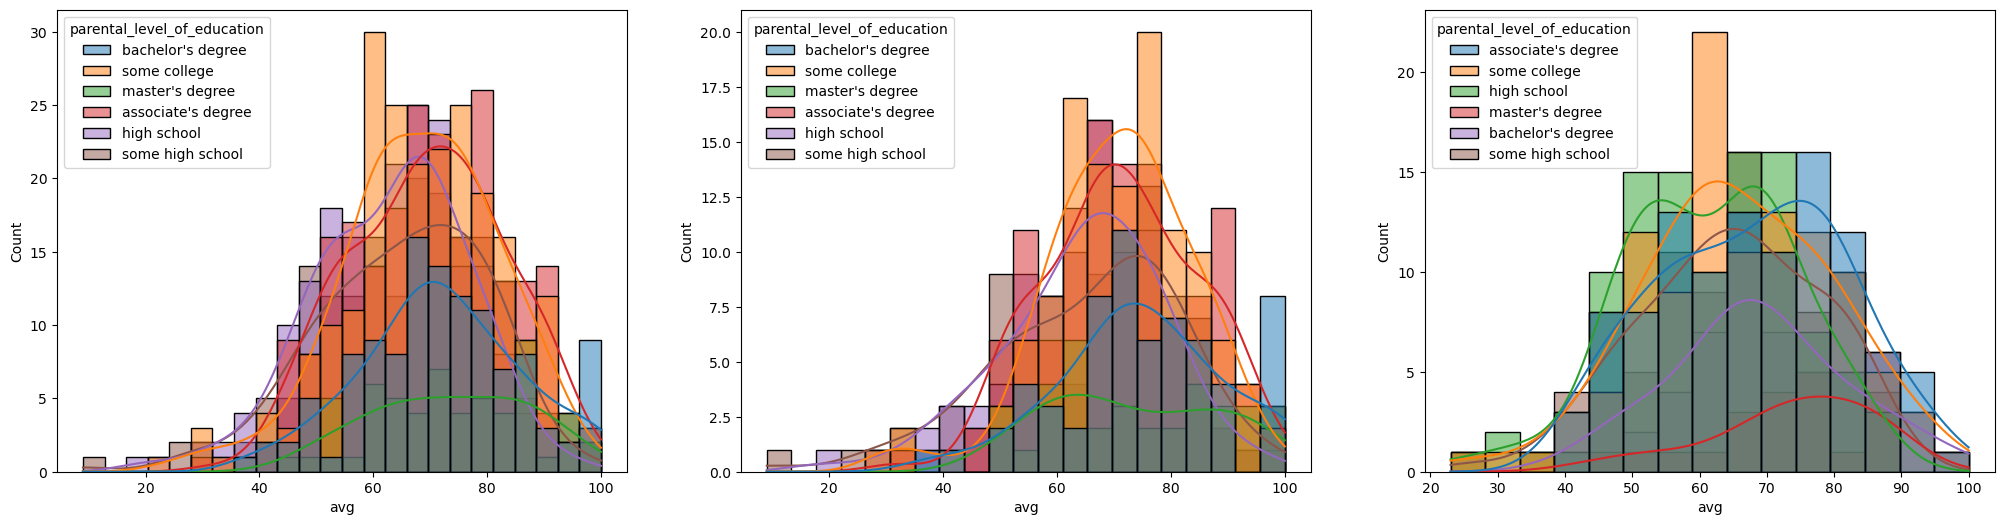

In [58]:
plt.subplots(1,3,figsize = (25,6))
plt.subplot(131)
sns.histplot(data=df, x='avg',kde=True,hue = 'parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"], x='avg',kde=True, hue = 'parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"], x='avg',kde=True,hue = 'parental_level_of_education')
plt.show()

- Average score of girls do not depends upon parents degree
- Average score of boys are more who parents education is either master's degree or associate's degree

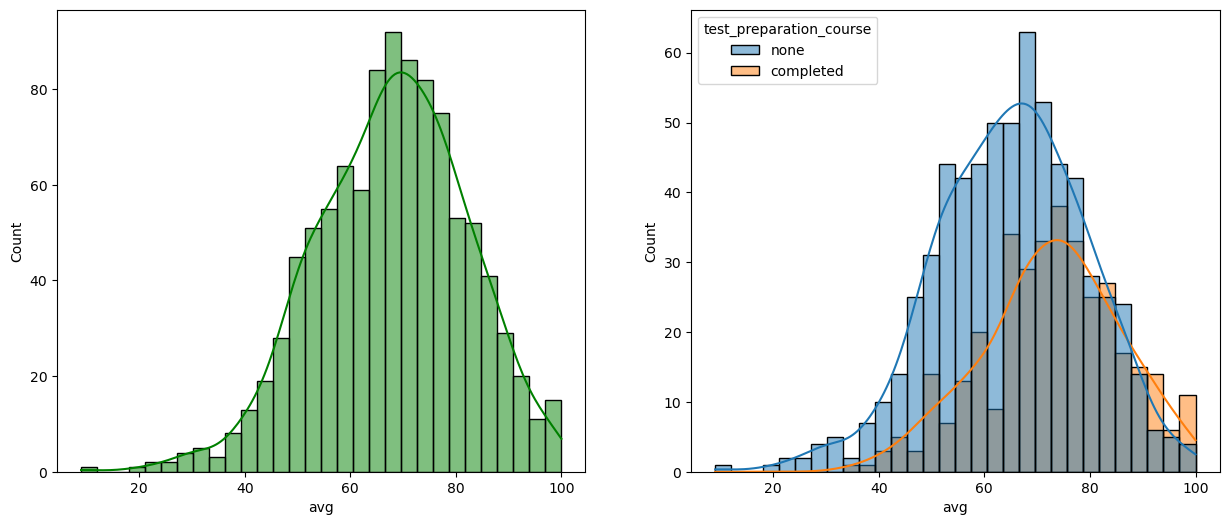

In [59]:
plt.subplots(1,2,figsize = (15,6))
plt.subplot(121)
sns.histplot(data=df, x='avg',bins=30,kde=True, color = 'green')
plt.subplot(122)
sns.histplot(data=df,x='avg',bins=30,kde=True,hue = 'test_preparation_course')
plt.show()

- students who have completed test prepration course have performed well 